## Importing the kaggle dataset

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets download dheerajperumandla/drowsiness-dataset

 99% 159M/161M [00:05<00:00, 40.2MB/s]
100% 161M/161M [00:05<00:00, 28.7MB/s]


In [ ]:
!unzip drowsiness-dataset.zip

In [ ]:
!kaggle datasets download adinishad/prediction-images

 85% 1.00M/1.18M [00:00<00:00, 1.98MB/s]
100% 1.18M/1.18M [00:00<00:00, 2.26MB/s]


In [ ]:
!unzip prediction-images.zip

Archive:  prediction-images.zip
  inflating: 322868_1100-1100x628.jpg  
  inflating: Malaria-Parasite-Detection-Using-an-SVM-output-5-0 (2).png  
  inflating: cell1.png               
  inflating: class5.csv              
  inflating: d41586-020-01430-5_17977552.jpg  
  inflating: daisy.jpg               
  inflating: dandelion.jpg           
  inflating: dandelion1.jpg          
  inflating: haarcascade.xml         
  inflating: haarcascade_frontalface_default.xml  
  inflating: rose.jpg                
  inflating: sunflower.jpg           


## Importing the dependencies and becoming one with the data

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2

In [ ]:
import os 

# Walk through directory and list number of files
for dirpath, dirnames, filenames in os.walk("train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 4 directories and 0 images in 'train'.
There are 0 directories and 726 images in 'train/Open'.
There are 0 directories and 723 images in 'train/yawn'.
There are 0 directories and 725 images in 'train/no_yawn'.
There are 0 directories and 726 images in 'train/Closed'.


In [ ]:
# Get the class names programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['Closed' 'Open' 'no_yawn' 'yawn']


In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

['26.jpg']
Image shape: (480, 640, 3)


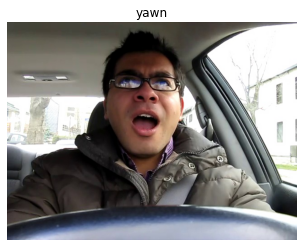

In [ ]:
img = view_random_image(target_dir="train/",
                        target_class="yawn")

In [ ]:
img.shape

(480, 640, 3)

['_281.jpg']
Image shape: (300, 344, 3)
['_432.jpg']
Image shape: (957, 957, 3)
['213.jpg']
Image shape: (480, 640, 3)
['2572.jpg']
Image shape: (480, 640, 3)


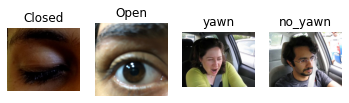

In [ ]:
# Visualize the data
plt.figure()
plt.subplot(1, 4, 1)
closed_img = view_random_image("train/", "Closed")
plt.subplot(1, 4, 2)
open_img = view_random_image("train/", "Open")
plt.subplot(1, 4, 3)
yawn_img = view_random_image("train/", "yawn")
plt.subplot(1, 4, 4)
noyawn_img = view_random_image("train/", "no_yawn")

## Function to detect faces for yawning in images

In [ ]:
def face_for_yawn(direc="train", face_cas_path="haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


yawn_no_yawn = face_for_yawn()

0
1


## Function to retrieve eye state data from images

In [ ]:
def get_data(dir_path="train", face_cas="haarcascade_frontalface_default.xml", eye_cas="haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [ ]:
data_train = get_data()

2
3


In [ ]:
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)

In [ ]:
new_data = append_data()

0
1
2
3


<ipython-input-16-be15ac3ad549>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(yaw_no)


In [ ]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

In [ ]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

## Preparing the data

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [ ]:
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [ ]:
len(X_test)

578

In [ ]:
len(X_train)

1347

In [ ]:
y_test

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

## Creating the model 

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras

In [ ]:
train_generator = ImageDataGenerator(rescale=1/255., zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255.)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

## Model training

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

In [ ]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator), callbacks=[early_stopping])

Epoch 1/50
43/43 [==============================] - 23s 268ms/step - loss: 1.2159 - accuracy: 0.4284 - val_loss: 0.6819 - val_accuracy: 0.7388
Epoch 2/50
43/43 [==============================] - 8s 186ms/step - loss: 0.5916 - accuracy: 0.7394 - val_loss: 0.3667 - val_accuracy: 0.8651
Epoch 3/50
43/43 [==============================] - 10s 223ms/step - loss: 0.4156 - accuracy: 0.8241 - val_loss: 0.3005 - val_accuracy: 0.8893
Epoch 4/50
43/43 [==============================] - 9s 214ms/step - loss: 0.3472 - accuracy: 0.8456 - val_loss: 0.2382 - val_accuracy: 0.9221
Epoch 5/50
43/43 [==============================] - 8s 192ms/step - loss: 0.3569 - accuracy: 0.8508 - val_loss: 0.2775 - val_accuracy: 0.8356
Epoch 6/50
43/43 [==============================] - 10s 221ms/step - loss: 0.2830 - accuracy: 0.8612 - val_loss: 0.1932 - val_accuracy: 0.9239
Epoch 7/50
43/43 [==============================] - 8s 193ms/step - loss: 0.2773 - accuracy: 0.8797 - val_loss: 0.2067 - val_accuracy: 0.9100
Epo

In [ ]:
def check_overfitting(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(train_loss) + 1)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

    last_val_loss = val_loss[-1]
    min_val_loss = np.min(val_loss)
    if last_val_loss > min_val_loss:
        print("Model is overfitting")
    else:
        print("Model is not overfitting")


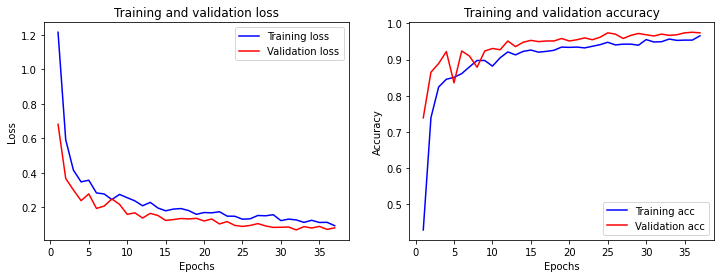

Model is overfitting


In [ ]:
check_overfitting(history)

## Plotting loss curves

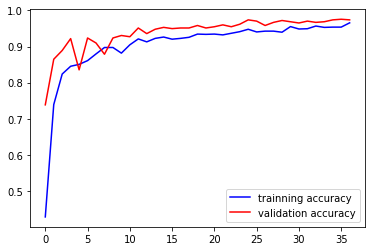

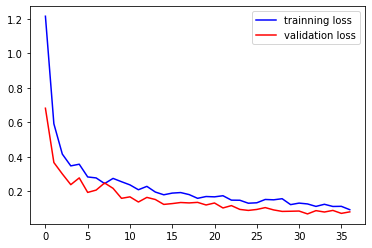

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

## Saving the model and predicting on the test data

In [ ]:
model.save("drowiness_new6.h5")

In [ ]:
model.save("drowiness_new6.model")

In [ ]:
prediction = model.predict(X_test)
prediction

19/19 [==============================] - 0s 25ms/step


array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [ ]:
prediction.shape

(578, 4)

In [ ]:
type(prediction)

numpy.ndarray

In [ ]:
prediction = prediction.reshape((prediction.shape[0], 1, prediction.shape[1]))

In [ ]:
prediction

array([[[0., 0., 0., 1.]],

       [[0., 0., 0., 1.]],

       [[0., 0., 1., 0.]],

       ...,

       [[0., 0., 0., 1.]],

       [[0., 0., 1., 0.]],

       [[0., 0., 1., 0.]]], dtype=float32)

In [ ]:
prediction.shape

(578, 1, 4)

## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

prediction = model.predict(X_test)
y_test_int = np.argmax(y_test, axis=1)
prediction_int = np.argmax(prediction, axis=1)

cf_matrix = confusion_matrix(y_test_int, prediction_int)
accuracy = accuracy_score(y_test_int, prediction_int)
print(cf_matrix)
print(accuracy)

19/19 [==============================] - 1s 25ms/step
[[ 59   3   1   0]
 [ 13  61   0   0]
 [  0   1 208   6]
 [  0   2   4 220]]
0.9480968858131488


[Text(0, 0.5, 'yawn'),
 Text(0, 1.5, 'no_yawn'),
 Text(0, 2.5, 'Closed'),
 Text(0, 3.5, 'Open')]

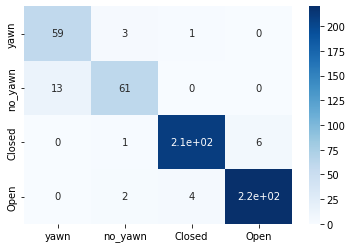

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.xaxis.set_ticklabels(['yawn','no_yawn','Closed','Open'])
ax.yaxis.set_ticklabels(['yawn','no_yawn','Closed','Open'])

In [ ]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), np.argmax(prediction, axis=1), target_names=labels_new))

              precision    recall  f1-score   support

        yawn       0.82      0.94      0.87        63
     no_yawn       0.91      0.82      0.87        74
      Closed       0.98      0.97      0.97       215
        Open       0.97      0.97      0.97       226

    accuracy                           0.95       578
   macro avg       0.92      0.93      0.92       578
weighted avg       0.95      0.95      0.95       578



In [ ]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=145):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values betwwen 0 and 1)
  img = img/255.
  return img

In [ ]:
image = load_and_prep_image("/content/istockphoto-1281112498-612x612.jpg")
image

<tf.Tensor: shape=(145, 145, 3), dtype=float32, numpy=
array([[[0.63376606, 0.66513866, 0.62200135],
        [0.6503178 , 0.68169034, 0.6385531 ],
        [0.66294795, 0.67471266, 0.63941854],
        ...,
        [0.45882353, 0.5254902 , 0.5019608 ],
        [0.45882353, 0.5254902 , 0.5019608 ],
        [0.44313726, 0.5176471 , 0.49411765]],

       [[0.637308  , 0.66868055, 0.6255433 ],
        [0.6465013 , 0.67787385, 0.6347366 ],
        [0.6518053 , 0.68193376, 0.63941854],
        ...,
        [0.46212304, 0.52878976, 0.50526035],
        [0.46212304, 0.52878976, 0.50526035],
        [0.44705883, 0.52156866, 0.49803922]],

       [[0.63948613, 0.6708587 , 0.6277214 ],
        [0.6428668 , 0.67423934, 0.6311021 ],
        [0.6430696 , 0.6828263 , 0.63941854],
        ...,
        [0.46301556, 0.5296822 , 0.5061528 ],
        [0.46301556, 0.5296822 , 0.5061528 ],
        [0.45125085, 0.52576065, 0.50223124]],

       ...,

       [[0.49411765, 0.56078434, 0.5372549 ],
        [0.49

In [ ]:
prediction = model.predict(tf.expand_dims(image, axis=0))
prediction

1/1 [==============================] - 0s 77ms/step


array([[3.6633387e-06, 9.1225556e-05, 7.5419062e-01, 2.4571452e-01]],
      dtype=float32)

## Preparing the test data and making the prediction

In [ ]:
import tensorflow as tf
import numpy as np
import cv2

In [ ]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath, face_cas="../input/prediction-images/haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("/content/drive/MyDrive/Drowsiness Detection/drowiness_new6.h5")

In [ ]:
prediction = model.predict([prepare("/content/drive/MyDrive/Drowsiness Detection/train/Closed/_101.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 175ms/step


2

In [ ]:
prediction = model.predict([prepare("/content/drive/MyDrive/Drowsiness Detection/train/Open/_104.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 101ms/step


3

In [ ]:
prediction = model.predict([prepare("/content/istockphoto-1281112498-612x612.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 21ms/step


2